# Incidence du syndrome grippal

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import requests
import isoweek

Les données de l'incidence du syndrome grippal sont disponibles du site Web du [Réseau Sentinelles](http://www.sentiweb.fr/). Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée. Nous téléchargeons toujours le jeu de données complet, qui commence en 1984 et se termine avec une semaine récente.

In [2]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-3.csv"

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [3]:
raw_data = pd.read_csv(data_url, skiprows=1)
raw_data

week  indicator     inc   inc_low    inc_up inc100  inc100_low  \
0     202504          3  375118  356288.0  393948.0    560       532.0   
1     202503          3  253215  239337.0  267093.0    378       357.0   
2     202502          3  257247  242991.0  271503.0    384       363.0   
3     202501          3  231549  214627.0  248471.0    345       320.0   
4     202452          3  201726  185870.0  217582.0    302       278.0   
...      ...        ...     ...       ...       ...    ...         ...   
2095  198448          3   78620   60634.0   96606.0    143       110.0   
2096  198447          3   72029   54274.0   89784.0    131        99.0   
2097  198446          3   87330   67686.0  106974.0    159       123.0   
2098  198445          3  135223  101414.0  169032.0    246       184.0   
2099  198444          3   68422   20056.0  116788.0    125        37.0   

      inc100_up geo_insee geo_name  
0         588.0        FR   France  
1         399.0        FR   France  
2         405.0        FR   France  
3         370.0        FR   France  
4         326.0        FR   France  
...         ...       ...      ...  
2095      176.0        FR   France  
2096      163.0        FR   France  
2097      195.0        FR   France  
2098      308.0        FR   France  
2099      213.0        FR   France  

[2100 rows x 10 columns]

Modification du code pour utiliser le fichier local contenant les données :
1. Vérifie si une copie locale des données existe déjà
2. Si elle n'existe pas, télécharge les données depuis le Réseau Sentinelles

In [9]:
file_path = r"C:\Users\33612\Downloads\inc-25-PAY.csv"

if not os.path.exists(file_path):
    response = requests.get(data_url)
    with open(file_path, "wb") as file:
        file.write(response.content)
    print("Téléchargement des données et sauvegarde locale.")
else:
    print("Données locales déjà existantes.")

raw_data = pd.read_csv(file_path, encoding = 'iso-8859-1', skiprows=1)
raw_data

Téléchargement des données et sauvegarde locale.


week  indicator     inc   inc_low    inc_up inc100  inc100_low  \
0     202504          3  375118  356288.0  393948.0    560       532.0   
1     202503          3  253215  239337.0  267093.0    378       357.0   
2     202502          3  257247  242991.0  271503.0    384       363.0   
3     202501          3  231549  214627.0  248471.0    345       320.0   
4     202452          3  201726  185870.0  217582.0    302       278.0   
...      ...        ...     ...       ...       ...    ...         ...   
2095  198448          3   78620   60634.0   96606.0    143       110.0   
2096  198447          3   72029   54274.0   89784.0    131        99.0   
2097  198446          3   87330   67686.0  106974.0    159       123.0   
2098  198445          3  135223  101414.0  169032.0    246       184.0   
2099  198444          3   68422   20056.0  116788.0    125        37.0   

      inc100_up geo_insee geo_name  
0         588.0        FR   France  
1         399.0        FR   France  
2         405.0        FR   France  
3         370.0        FR   France  
4         326.0        FR   France  
...         ...       ...      ...  
2095      176.0        FR   France  
2096      163.0        FR   France  
2097      195.0        FR   France  
2098      308.0        FR   France  
2099      213.0        FR   France  

[2100 rows x 10 columns]

Y a-t-il des points manquants dans ce jeux de données ? Oui, la semaine 19 de l'année 1989 n'a pas de valeurs associées.

In [21]:
raw_data[raw_data.isnull().any(axis=1)]

week  indicator inc  inc_low  inc_up inc100  inc100_low  inc100_up  \
1863  198919          3   -      NaN     NaN      -         NaN        NaN   

     geo_insee geo_name  
1863        FR   France

Nous éliminons ce point, ce qui n'a pas d'impact fort sur notre analyse qui est assez simple.

In [22]:
data = raw_data.dropna().copy()
data

week  indicator     inc   inc_low    inc_up inc100  inc100_low  \
0     202504          3  375118  356288.0  393948.0    560       532.0   
1     202503          3  253215  239337.0  267093.0    378       357.0   
2     202502          3  257247  242991.0  271503.0    384       363.0   
3     202501          3  231549  214627.0  248471.0    345       320.0   
4     202452          3  201726  185870.0  217582.0    302       278.0   
5     202451          3  201697  187843.0  215551.0    302       281.0   
6     202450          3  136694  126369.0  147019.0    205       190.0   
7     202449          3  108487   99037.0  117937.0    163       149.0   
8     202448          3   87381   78687.0   96075.0    131       118.0   
9     202447          3   76286   67626.0   84946.0    114       101.0   
10    202446          3   56399   49006.0   63792.0     85        74.0   
11    202445          3   47347   40843.0   53851.0     71        61.0   
12    202444          3   36039   30122.0   41956.0     54        45.0   
13    202443          3   46572   39928.0   53216.0     70        60.0   
14    202442          3   67785   60009.0   75561.0    102        90.0   
15    202441          3   79435   71386.0   87484.0    119       107.0   
16    202440          3   84965   76555.0   93375.0    127       114.0   
17    202439          3   91660   82937.0  100383.0    137       124.0   
18    202438          3   91786   82903.0  100669.0    138       125.0   
19    202437          3   56460   49319.0   63601.0     85        74.0   
20    202436          3   33657   27906.0   39408.0     50        41.0   
21    202435          3   27404   22036.0   32772.0     41        33.0   
22    202434          3   26717   21003.0   32431.0     40        31.0   
23    202433          3   20623   15349.0   25897.0     31        23.0   
24    202432          3   23187   17532.0   28842.0     35        27.0   
25    202431          3   26035   20267.0   31803.0     39        30.0   
26    202430          3   36393   28593.0   44193.0     55        43.0   
27    202429          3   39560   32592.0   46528.0     59        49.0   
28    202428          3   54342   45781.0   62903.0     81        68.0   
29    202427          3   47364   40234.0   54494.0     71        60.0   
...      ...        ...     ...       ...       ...    ...         ...   
2070  198521          3   26096   19621.0   32571.0     47        35.0   
2071  198520          3   27896   20885.0   34907.0     51        38.0   
2072  198519          3   43154   32821.0   53487.0     78        59.0   
2073  198518          3   40555   29935.0   51175.0     74        55.0   
2074  198517          3   34053   24366.0   43740.0     62        44.0   
2075  198516          3   50362   36451.0   64273.0     91        66.0   
2076  198515          3   63881   45538.0   82224.0    116        83.0   
2077  198514          3  134545  114400.0  154690.0    244       207.0   
2078  198513          3  197206  176080.0  218332.0    357       319.0   
2079  198512          3  245240  223304.0  267176.0    445       405.0   
2080  198511          3  276205  252399.0  300011.0    501       458.0   
2081  198510          3  353231  326279.0  380183.0    640       591.0   
2082  198509          3  369895  341109.0  398681.0    670       618.0   
2083  198508          3  389886  359529.0  420243.0    707       652.0   
2084  198507          3  471852  432599.0  511105.0    855       784.0   
2085  198506          3  565825  518011.0  613639.0   1026       939.0   
2086  198505          3  637302  592795.0  681809.0   1155      1074.0   
2087  198504          3  424937  390794.0  459080.0    770       708.0   
2088  198503          3  213901  174689.0  253113.0    388       317.0   
2089  198502          3   97586   80949.0  114223.0    177       147.0   
2090  198501          3   85489   65918.0  105060.0    155       120.0   
2091  198452          3   84830   60602.0  109058.0    154       110.0   
2092  198451

Nos données utilisent une convention inhabituelle: le numéro de
semaine est collé à l'année, donnant l'impression qu'il s'agit
de nombre entier. C'est comme ça que Pandas les interprète.
  
Un deuxième problème est que Pandas ne comprend pas les numéros de
semaine.  Il faut lui fournir les dates de début et de fin de
semaine. Nous utilisons pour cela la bibliothèque `isoweek`.

Comme la conversion des semaines est devenu assez complexe, nous
écrivons une petite fonction Python pour cela. Ensuite, nous
l'appliquons à tous les points de nos donnés. Les résultats vont
dans une nouvelle colonne 'period'.

In [23]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

Il restent deux petites modifications à faire.

Premièrement, nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [24]:
sorted_data = data.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.

Ceci s'avère tout à fait juste sauf pour deux périodes consécutives
entre lesquelles il manque une semaine.

Nous reconnaissons ces dates: c'est la semaine sans observations
que nous avions supprimées !

In [25]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

1989-05-01/1989-05-07 1989-05-15/1989-05-21


Un premier regard sur les données !

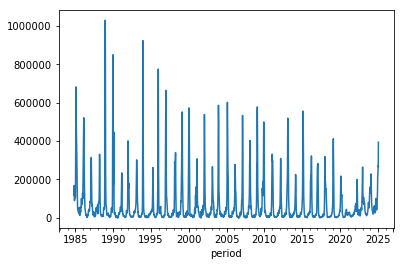

In [37]:
sorted_data['inc_up'].plot()

Un zoom sur les dernières années montre mieux la situation des pics en hiver. Le creux des incidences se trouve en été.

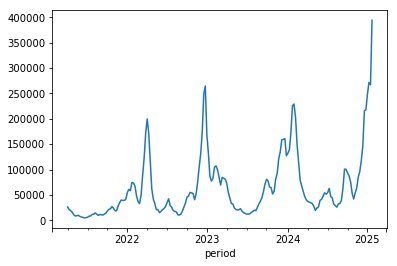

In [36]:
sorted_data['inc_up'][-200:].plot()

## Etude de l'incidence annuelle

Etant donné que le pic de l'épidémie se situe en hiver, à cheval
entre deux années civiles, nous définissons la période de référence
entre deux minima de l'incidence, du 1er août de l'année $N$ au
1er août de l'année $N+1$.

Notre tâche est un peu compliquée par le fait que l'année ne comporte
pas un nombre entier de semaines. Nous modifions donc un peu nos périodes
de référence: à la place du 1er août de chaque année, nous utilisons le
premier jour de la semaine qui contient le 1er août.

Comme l'incidence de syndrome grippal est très faible en été, cette
modification ne risque pas de fausser nos conclusions.

Encore un petit détail: les données commencent an octobre 1984, ce qui
rend la première année incomplète. Nous commençons donc l'analyse en 1985.

In [29]:
 first_august_week = [pd.Period(pd.Timestamp(y, 8, 1), 'W')
                     for y in range(1985,
                                    sorted_data.index[-1].year)]

En partant de cette liste des semaines qui contiennent un 1er août, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [32]:
 year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc_up'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Voici les incidences annuelles.

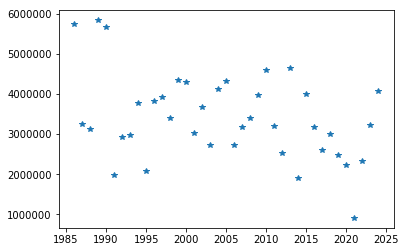

In [33]:
yearly_incidence.plot(style='*')

Une liste triée permet de plus facilement répérer les valeurs les plus élevées (à la fin).

In [34]:
yearly_incidence.sort_values()

2021     910589.0
2014    1911251.0
1991    1980417.0
1995    2090418.0
2020    2226761.0
2022    2338967.0
2019    2481665.0
2012    2536425.0
2017    2593378.0
2006    2719258.0
2003    2734405.0
1992    2921510.0
1993    2986279.0
2018    2991551.0
2001    3040167.0
1988    3131459.0
2016    3177327.0
2007    3181219.0
2011    3205326.0
2023    3217613.0
1987    3253239.0
2008    3403787.0
1998    3410332.0
2002    3688034.0
1994    3765327.0
1996    3837601.0
1997    3923810.0
2009    3965230.0
2015    4002562.0
2024    4075202.0
2004    4133721.0
2000    4288499.0
2005    4326419.0
1999    4350757.0
2010    4601495.0
2013    4657613.0
1990    5675038.0
1986    5758913.0
1989    5840764.0
dtype: float64

Enfin, un histogramme montre bien que les épidémies fortes, qui touchent environ 10% de la population
  française, sont assez rares: il y en eu trois au cours des 35 dernières années.

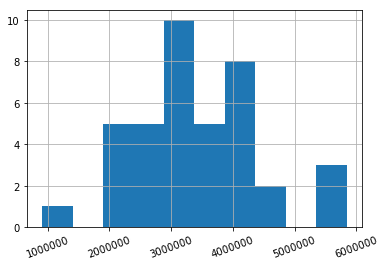

In [35]:
yearly_incidence.hist(xrot=20)